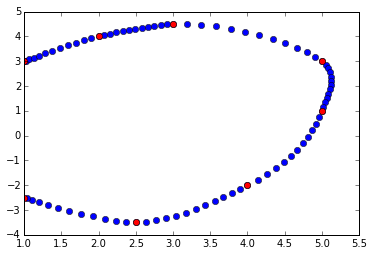

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt

def spline( t, t0, t1, t2, t3, p0, p1, p2, p3 ):
    
    a1_x = (t1-t)/(t1-t0)*p0[0] + (t-t0)/(t1-t0)*p1[0]
    a2_x = (t2-t)/(t2-t1)*p1[0] + (t-t1)/(t2-t1)*p2[0]
    a3_x = (t3-t)/(t3-t2)*p2[0] + (t-t2)/(t3-t2)*p3[0]

    b1_x = (t2-t)/(t2-t0)*a1_x + (t-t0)/(t2-t0)*a2_x
    b2_x = (t3-t)/(t3-t1)*a2_x + (t-t1)/(t3-t1)*a3_x

    c_x  = (t2-t)/(t2-t1)*b1_x + (t-t1)/(t2-t1)*b2_x
    
    a1_y = (t1-t)/(t1-t0)*p0[1] + (t-t0)/(t1-t0)*p1[1]
    a2_y = (t2-t)/(t2-t1)*p1[1] + (t-t1)/(t2-t1)*p2[1]
    a3_y = (t3-t)/(t3-t2)*p2[1] + (t-t2)/(t3-t2)*p3[1]

    b1_y = (t2-t)/(t2-t0)*a1_y + (t-t0)/(t2-t0)*a2_y
    b2_y = (t3-t)/(t3-t1)*a2_y + (t-t1)/(t3-t1)*a3_y

    c_y  = (t2-t)/(t2-t1)*b1_y + (t-t1)/(t2-t1)*b2_y
    
    return c_x, c_y


def plot_curve( p, n_step=25, alpha=0 ):
    
    curve = list()
    
    # first curve
    t0 = 0
    t1 = (0.1)**alpha + t0 # for numerical stability (divide-by-zero)
    t2 = ((p[1][0]-p[0][0])**2 + (p[1][1]-p[0][1])**2)**alpha + t1
    t3 = ((p[2][0]-p[1][0])**2 + (p[2][1]-p[1][1])**2)**alpha + t2
    step = (t2-t1) / n_step
                
    for j in range(n_step):
        cx, cy = spline(t1+j*step, t0, t1, t2, t3, p[0], p[0], p[1], p[2])
        curve.append([cx, cy])
    
    # middle curve
    for i in range(len(p)-3):
        t0 = 0
        t1 = ((p[i+1][0]-p[i][0])**2   + (p[i+1][1]-p[i][1])**2)**alpha + t0
        t2 = ((p[i+2][0]-p[i+1][0])**2 + (p[i+2][1]-p[i+1][1])**2)**alpha + t1
        t3 = ((p[i+3][0]-p[i+2][0])**2 + (p[i+3][1]-p[i+2][1])**2)**alpha + t2
        step = (t2-t1) / n_step
        
        for j in range(n_step):
            cx, cy = spline(t1+j*step, t0, t1, t2, t3, p[i], p[i+1], p[i+2], p[i+3])
            curve.append([cx, cy])
            
    # last curve
    t0 = 0
    t1 = ((p[-2][0]-p[-3][0])**2 + (p[-2][1]-p[-3][1])**2)**alpha + t0
    t2 = ((p[-1][0]-p[-2][0])**2 + (p[-1][1]-p[-2][1])**2)**alpha + t1
    t3 = (0.1)**alpha + t2 # for numerical stability (divide-by-zero)
    step = (t2-t1) / n_step
    
    for j in range(n_step):
        cx, cy = spline(t1+j*step, t0, t1, t2, t3, p[-3], p[-2], p[-1], p[-1])
        curve.append([cx, cy])

    return curve


pts = [ [1, 3], [2,4], [3, 4.5], [5, 3], [5, 1], 
        [4, -2], [2.5, -3.5], [1, -2.5] ]
cv = plot_curve(pts, 12, alpha=0.5)

x, y = zip(*cv)
plt.plot(x, y, "or", color="blue")

px, py = zip(*pts)
plt.plot(px, py, "or")

plt.show()